In [1]:
%matplotlib inline

Both simulations are the summary taken from this article:
* https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/

Data for our simulation is taken from MysIDC (Malaysia Informative Data Centre). Kudos for Malaysia Government because now they have taken a small initiative in reducing data illiteracy among Malaysian citizen.

# F-test

This test is used by researcher to compare the variance between two sample sets. For instance, if we have dataset 1 with variance 6 and dataset 2 with variance 2, if we conduct an F-test, the F-statistic that we'll have is given by 

$$ F = \frac{\sigma_{1}^2}{\sigma_{2}^2} = \frac{6}{2} = 3 $$

and we'll use the f distribution table to check and compare this F-statistic with the critical value that we desired.
The underlying idea of why this test make sense is that we are actually comparing the variability of our sample. If we assume that both of our datasets are coming from normal distribution, however, if one of the dataset have a very large variability compare to the other dataset, we could say that both datasets might coming from a different normal distribution.

One example that we can try to think of is the temperature data. If we have two researchers collecting temperature value at two different places which is a researcher A collects the data from the Arctic region and researcher B collects the data from Sahara region. Obviously a person can tell right away which dataset are coming from researcher B or researcher A right? A desert temperature can vary from 40 degree Celsius to -4 degree Celsius while temperature at the Arctic varies from -34 degree Celsius to -12 degree Celsius. In other words, higher variability among two datasets might indicate a different origin (coming from different distribution).

Now, let us look into this test further by simulate it using the data that we have (will use the MysIDC "Illiteracy rate of population aged 15-24 years by sex 2001-2021" dataset for the simulation).

Please note that before doing F-test, we should check first our data if it follows the below assumption:
1. Normally distributed (can use qqplot, shapiro etc. to check)
2. Homoscedasticity (equal variance) (can use bartlett, levene, chi square etc. to check)
3. Independency. (sometime we can try to use residual plot to check if our data has increasing/decreasing, sinusoidal pattern)

If our data violate one of the assumptions above, F-test result (or other parametric analysis such as t-test, anova) will be inaccurate. Thus, we might need to use other statistical technique for analysis (usually will use nonparametric technique).

However, for this simulation, I will skip checking the assumptions since my focus is to see if we can really obtain the F-distribution if we use the formula \$ F = \frac{\sigma_{1}^2}{\sigma_{2}^2}$ above to generate our sampling distribution.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = 'C:/Users/farea/Desktop/Illiteracy rate of population aged 15-24 years by sex 2001 - 2021 Malaysia_dataset.xlsx'

data = pd.read_excel(path)
data = data.pivot(index='Year', columns = 'Sex', values = 'Illiteracy rate (%)')
data

Sex,Female,Male,Total
Year,,,
2001,1.700000,1.500000,1.600000
2002,1.800000,1.700000,1.800000
2003,1.700000,1.600000,1.700000
2004,1.800000,1.600000,1.700000
2005,1.700000,1.500000,1.600000
2006,1.600000,1.600000,1.600000
2007,1.500000,1.500000,1.500000
2008,1.600000,1.600000,1.600000
2009,1.600000,1.500000,1.500000


In [35]:
var1 = np.var(data['Female'])
var2 = np.var(data['Male'])
print('Variance for female: ', var1,
     '\nVariance for male: ', var2)

Variance for female:  0.24166158261649978 
Variance for male:  0.4343716532006387


We will see that there will not be a significant difference between variance of female and male illiteracy rate (because  0.4/0.2 \$ \approx $ 2 which is lesser than our critical value of 2.12 (df=(19,19)) (https://statisticsbyjim.com/hypothesis-testing/f-table/ for reference). But let us check if our intuition is correct or not. Since there is no specific package that contain f-test (that compare equality of variance among two sample), we'll create our own f-test

In [19]:
# We'll use one sided f-test instead of two-sided

def f_test(data1, data2, ci=0.90):
    from scipy.stats import f
    
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    df1, df2 = len(data1)-1, len(data2)-1
    
    f_stat = var1/var2    
    critical_val = f.ppf(ci, df1, df2)
    pval = 1 - f.cdf(f_stat, df1, df2)
    
    return f_stat, critical_val, pval

In [37]:
fval, critval, p = f_test(data['Male'],data['Female'], 0.95) # we'll test our data with 95% confidence level
print('With 95% confidence level and critical value of: ', critval,
      '\nwe obtain an F-statistic of: ', fval, '\nwith p-value: ', p)

With 95% confidence level and critical value of:  2.1241552129197356 
we obtain an F-statistic of:  1.7974377577836047 
with p-value:  0.0992422076811934


And thus we don't have sufficient evident to reject the null hypothesis (that saying our sample have equal variance). So, we cannot conclude that the illiteracy rate between female and male has different variance.

Now, we'll use sampling distribution and use plotting to visualize our f-distribution.

In [46]:
nsample = 10000
data1 = np.random.choice(data['Female'], size=(20,nsample)) # size=20 because we want to compare with our actual f-distribution with df(19,19)
data2 = np.random.choice(data['Male'], size=(20,nsample))

var1 = np.var(data1, axis=0)
var2 = np.var(data2, axis=0)

fvals = var2/var1
fmean = np.mean(fvals)

print('F-statistic from sampling distribution: ', fmean)

F-statistic from sampling distribution:  1.9700171574017917


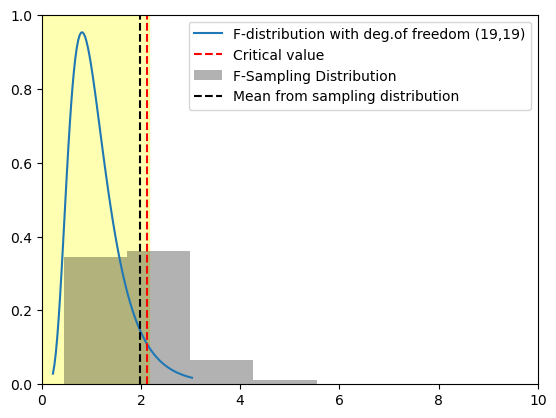

In [50]:
from scipy.stats import f

x = np.linspace(f.ppf(0.001, 19, 19), f.ppf(0.99, 19, 19), 100)
rv = f(19,19)

fig, ax = plt.subplots()
ax.plot(x, rv.pdf(x), label='F-distribution with deg.of freedom (19,19)')
ax.axvspan(0, f.ppf(0.95, 19, 19), color='yellow', alpha=0.3)
ax.axvline(2.1241552129197356, linestyle='dashed', label='Critical value', color='red')
ax.hist(fvals, density=True, color='black', alpha=0.3, label='F-Sampling Distribution')
ax.axvline(fmean, linestyle='dashed', label='Mean from sampling distribution', color='black')
ax.set_xlim([0,10])
plt.legend(loc='best')

The F-test is different from ANOVA technique but the concept used is the same. The F-test that we have discussed here simply comparing the variance of two sample. However, the ANOVA use the F-test but it compares the within group variance (variation of data between its group mean) from the between group variance (variation of group mean). We'll look into this once we discussed the ANOVA technique in the future. 